In [329]:
import pandas as pd

In [330]:
hotels = pd.read_csv('hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [331]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

In [332]:
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)
hotels = hotels.fillna(0)

In [333]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


In [334]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [335]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [336]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [337]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [338]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1414279723760351


### Ответы на задачу 4

In [592]:
import pandas as pd
import numpy as np

hotels = pd.read_csv('hotels.csv') # заново повторяем цикл процедуры EDA, при этом название оставил прежним


hotels['hotel_name'].nunique()

1492

In [593]:
hotels['review_date']=pd.to_datetime(hotels['review_date'], dayfirst=False)
hotels['review_date'].max()

Timestamp('2017-08-03 00:00:00')

In [594]:
hotels['review_date'].min()

Timestamp('2015-08-04 00:00:00')

In [595]:
hotels['tags'].nunique()

47135

In [596]:
mode_value = hotels['tags'].mode().iloc[0]
print(mode_value)

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']


In [597]:
hotels['lng'].nunique()

1472

In [598]:
hotels=hotels.drop_duplicates()
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  object        
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64         
 9 

### Удаление строковых значений

In [600]:
hotels=hotels.drop(['hotel_address', 'review_date', 'hotel_name', 
                   'negative_review', 'positive_review', 'tags'], axis=1) # остальные строковые проверим на предмет полезности


### Очистка от пропущенных значений

In [602]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 11 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   average_score                               386496 non-null  float64
 2   reviewer_nationality                        386496 non-null  object 
 3   review_total_negative_word_counts           386496 non-null  int64  
 4   total_number_of_reviews                     386496 non-null  int64  
 5   review_total_positive_word_counts           386496 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 7   reviewer_score                              386496 non-null  float64
 8   days_since_review                           386496 non-null  object 
 9   lat                                         384048 non-null  float64
 10  l

##### Целесообразным кажется заполнения  пропусков медианой

In [604]:
hotels['lat']=hotels['lat'].fillna(hotels['lat'].median())
hotels['lng']=hotels['lng'].fillna(hotels['lng'].median())

In [605]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 11 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   average_score                               386496 non-null  float64
 2   reviewer_nationality                        386496 non-null  object 
 3   review_total_negative_word_counts           386496 non-null  int64  
 4   total_number_of_reviews                     386496 non-null  int64  
 5   review_total_positive_word_counts           386496 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 7   reviewer_score                              386496 non-null  float64
 8   days_since_review                           386496 non-null  object 
 9   lat                                         386496 non-null  float64
 10  l

### Создание новых признаков

In [607]:
hotels['reviewer_nationality'].value_counts()

reviewer_nationality
United Kingdom               183952
United States of America      26494
Australia                     16216
Ireland                       11119
United Arab Emirates           7612
                              ...  
Cook Islands                      1
Guinea                            1
Comoros                           1
Anguilla                          1
Grenada                           1
Name: count, Length: 225, dtype: int64

<Axes: xlabel='reviewer_nationality'>

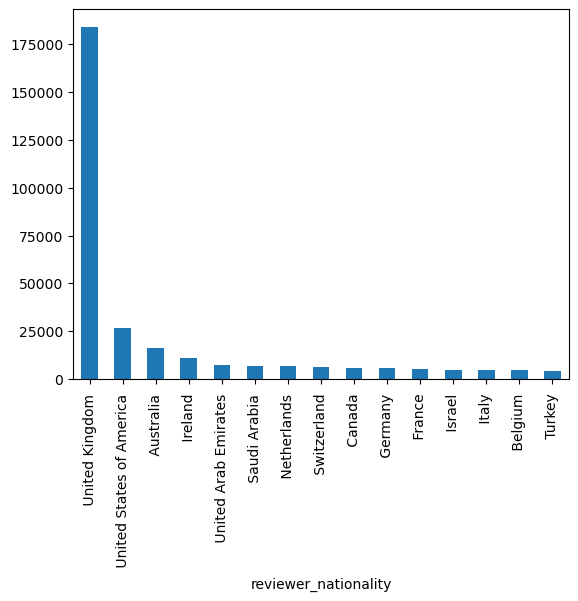

In [608]:
hotels['reviewer_nationality'].value_counts().head(15).plot(kind='bar')

In [609]:
nationality_counts = hotels['reviewer_nationality'].value_counts()
hotels['reviewer_nationality_freq'] = hotels['reviewer_nationality'].map(nationality_counts) # кодировка по частоте национальностей
hotels.drop(['reviewer_nationality'], axis=1, inplace=True) # убираю строковой столбец

### Преобразование признаков

In [611]:
# теперь конвертируем столбец days_since_review в numerical 
hotels['days_since_review']= hotels['days_since_review'].apply(lambda x: int(x.split()[0]))
hotels

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,reviewer_nationality_freq
0,581,8.4,3,1994,4,7,10.0,531,51.507894,-0.143671,183952
1,299,8.3,3,1361,2,14,6.3,203,51.521009,-0.123097,183952
2,32,8.9,6,406,0,14,7.5,289,48.845377,2.325643,2562
3,34,7.5,0,607,11,8,10.0,681,48.888697,2.394540,183952
4,914,8.5,4,7586,20,10,9.6,516,52.385601,4.847060,2104
...,...,...,...,...,...,...,...,...,...,...,...
386798,107,9.0,0,617,10,10,8.8,106,51.494028,-0.191050,5524
386799,272,8.4,0,3224,93,1,9.2,171,48.192379,16.399451,4102
386800,457,6.8,12,2751,9,21,8.3,543,51.520795,-0.131084,6598
386801,365,8.1,0,1567,6,28,9.2,74,51.515125,-0.160066,7612


##### Остались только числовые столбцы

### Отбор признаков

In [614]:
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [615]:
num_cols=['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts',
          'total_number_of_reviews_reviewer_has_given', 'lng', 
         'additional_number_of_scoring', 'days_since_review', 'reviewer_nationality_freq'] 

cat_cols=['average_score',  'lat']


<Axes: >

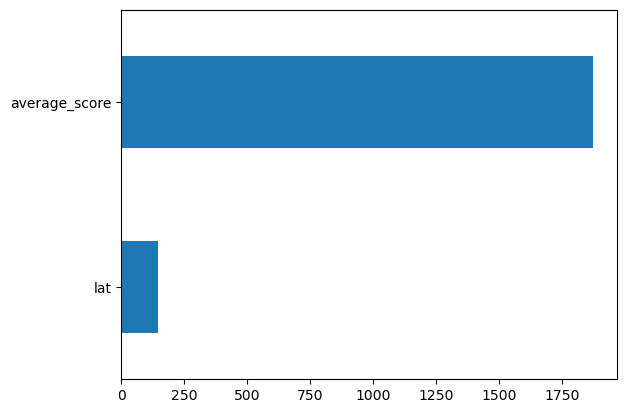

In [616]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

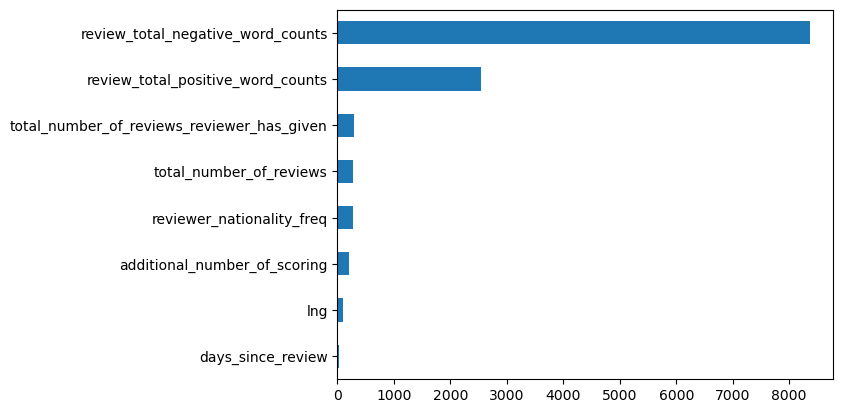

In [617]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [618]:
X = X.drop(['days_since_review'], axis = 1)  
y = hotels['reviewer_score'] 

In [619]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [620]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [621]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [622]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13872672783270917
